In [2]:

import pandas as pd


In [3]:

df = pd.read_csv('cost_revenue.csv')
df.head()


,Unnamed: 0,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,1,5140,1916-05-09,Intolerance,385907,0,0
2,2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

missing_values = df.isnull().sum()

data_types = df.dtypes

df['Release_Date'] = pd.to_datetime(df['Release_Date'])

df.head(), data_types, missing_values


(   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
 0  5293   1915-08-02           The Birth of a Nation                 110000   
 1  5140   1916-05-09                     Intolerance                 385907   
 2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
 3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
 4  5222   1925-01-01                  The Big Parade                 245000   
 
    USD_Worldwide_Gross  USD_Domestic_Gross  
 0             11000000            10000000  
 1                    0                   0  
 2              8000000             8000000  
 3              3000000             3000000  
 4             22000000            11000000  ,
 Rank                      int64
 Release_Date             object
 Movie_Title              object
 USD_Production_Budget     int64
 USD_Worldwide_Gross       int64
 USD_Domestic_Gross        int64
 dtype: object,
 Rank                     0

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


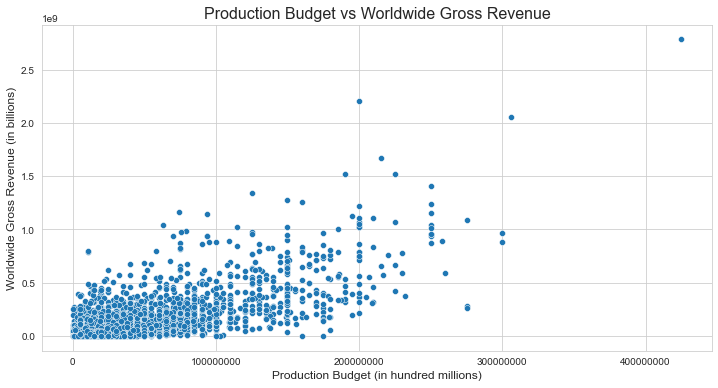

In [ ]:

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='USD_Production_Budget', y='USD_Worldwide_Gross', data=df)

plt.title('Production Budget vs Worldwide Gross Revenue', fontsize=16)
plt.xlabel('Production Budget (in hundred millions)', fontsize=12)
plt.ylabel('Worldwide Gross Revenue (in billions)', fontsize=12)
plt.ticklabel_format(style='plain', axis='x') # Fix scientific notation in x-axis

plt.show()


performing descriptive statistics on the cleaned data

In [ ]:



average_budget = df['USD_Production_Budget'].mean()
average_worldwide_gross = df['USD_Worldwide_Gross'].mean()

min_worldwide_gross = df['USD_Worldwide_Gross'].min()
min_domestic_gross = df['USD_Domestic_Gross'].min()

df_sorted = df.sort_values(by='USD_Worldwide_Gross')
bottom_quartile = df_sorted[:int(0.25 * len(df_sorted))]
average_profit_bottom_quartile = (bottom_quartile['USD_Worldwide_Gross'] - bottom_quartile['USD_Production_Budget']).mean()

highest_budget_film = df.loc[df['USD_Production_Budget'].idxmax()]
highest_gross_film = df.loc[df['USD_Worldwide_Gross'].idxmax()]

average_budget, average_worldwide_gross, min_worldwide_gross, min_domestic_gross, average_profit_bottom_quartile, highest_budget_film, highest_gross_film


(31113737.57837136,
 88855421.96271564,
 0,
 0,
 -5442209.622123237,
 Rank                                       1
 Release_Date             2009-12-18 00:00:00
 Movie_Title                           Avatar
 USD_Production_Budget              425000000
 USD_Worldwide_Gross               2783918982
 USD_Domestic_Gross                 760507625
 Name: 3529, dtype: object,
 Rank                                       1
 Release_Date             2009-12-18 00:00:00
 Movie_Title                           Avatar
 USD_Production_Budget              425000000
 USD_Worldwide_Gross               2783918982
 USD_Domestic_Gross                 760507625
 Name: 3529, dtype: object)

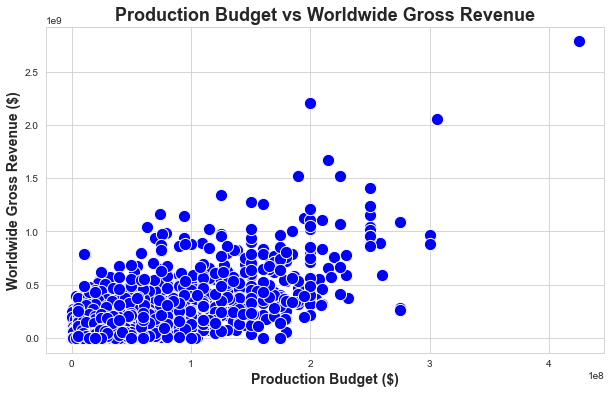

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=df, x='USD_Production_Budget', y='USD_Worldwide_Gross', color='blue', edgecolor='w', s=150)

scatterplot.set_title('Production Budget vs Worldwide Gross Revenue', fontsize=18, fontweight='bold')
scatterplot.set_xlabel('Production Budget ($)', fontsize=14, fontweight='bold')
scatterplot.set_ylabel('Worldwide Gross Revenue ($)', fontsize=14, fontweight='bold')

plt.show()


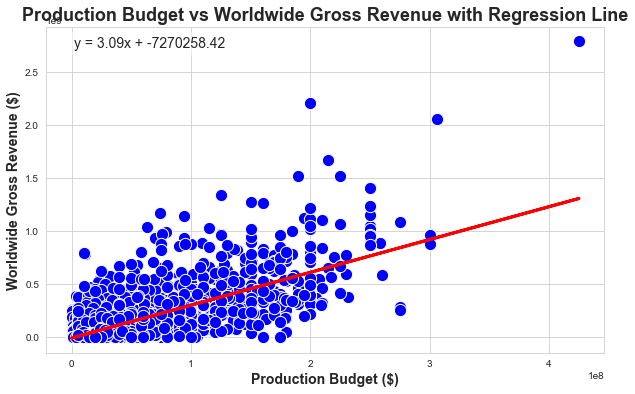

In [ ]:

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X = df[['USD_Production_Budget']]  
y = df['USD_Worldwide_Gross']      

model = LinearRegression()


model.fit(X, y)


slope = model.coef_[0]  
intercept = model.intercept_  


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', edgecolor='w', s=150)
plt.plot(X, model.predict(X), color='red', linewidth=3)


plt.title('Production Budget vs Worldwide Gross Revenue with Regression Line', fontsize=18, fontweight='bold')
plt.xlabel('Production Budget ($)', fontsize=14, fontweight='bold')
plt.ylabel('Worldwide Gross Revenue ($)', fontsize=14, fontweight='bold')


regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(0.05, 0.95, regression_equation, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes,
         fontsize=14, bbox=dict(facecolor='white', alpha=0.5))


plt.show()



Key Insights:
1. There is a positive correlation between production budget and worldwide gross revenue, indicating that, on average, films with higher budgets tend to generate more revenue.
2. The regression analysis suggests that for every dollar spent on production, there is an expected increase in worldwide gross revenue of approximately $3.09.
3. However, this relationship is not guaranteed for all films, as indicated by the wide spread of data points around the regression line.
4. Films in the bottom 25% of revenue are, on average, not profitable, which suggests a significant risk in film production and the potential for loss.
5. The highest grossing film in the dataset, 'Avatar', had an exceptionally high production budget, which could suggest that high investment in certain blockbuster films can lead to significant financial success.


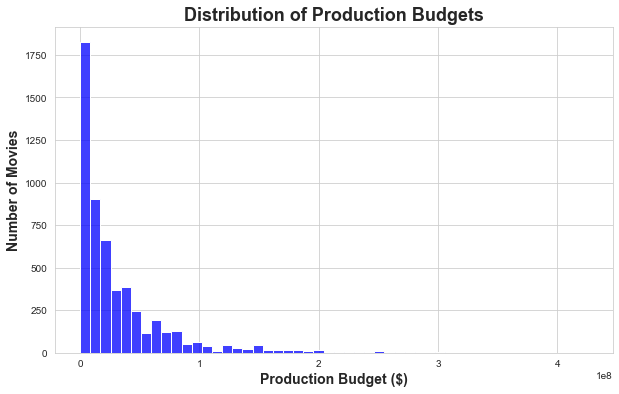

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
histogram = sns.histplot(df['USD_Production_Budget'], bins=50, kde=False, color='blue')

histogram.set_title('Distribution of Production Budgets', fontsize=18, fontweight='bold')
histogram.set_xlabel('Production Budget ($)', fontsize=14, fontweight='bold')
histogram.set_ylabel('Number of Movies', fontsize=14, fontweight='bold')

plt.show()


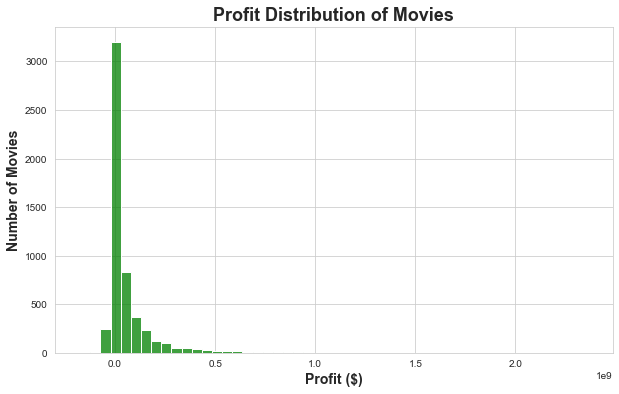

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

df['Profit'] = df['USD_Worldwide_Gross'] - df['USD_Production_Budget']

plt.figure(figsize=(10, 6))
profit_margin_plot = sns.histplot(df['Profit'], bins=50, kde=False, color='green')
profit_margin_plot.set_title('Profit Distribution of Movies', fontsize=18, fontweight='bold')
profit_margin_plot.set_xlabel('Profit ($)', fontsize=14, fontweight='bold')
profit_margin_plot.set_ylabel('Number of Movies', fontsize=14, fontweight='bold')
plt.show()


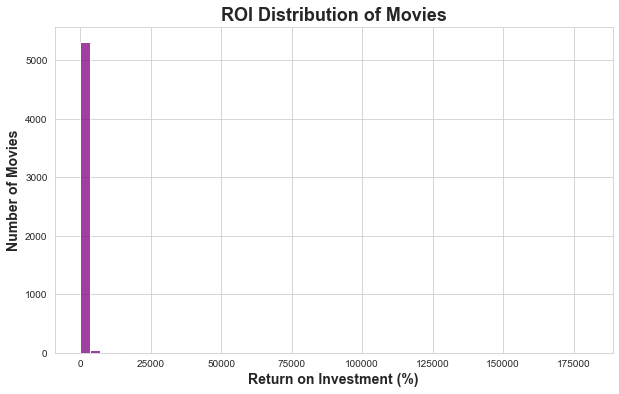

In [ ]:

df['ROI'] = (df['Profit'] / df['USD_Production_Budget']) * 100

plt.figure(figsize=(10, 6))
roi_plot = sns.histplot(df['ROI'], bins=50, kde=False, color='purple')
roi_plot.set_title('ROI Distribution of Movies', fontsize=18, fontweight='bold')
roi_plot.set_xlabel('Return on Investment (%)', fontsize=14, fontweight='bold')
roi_plot.set_ylabel('Number of Movies', fontsize=14, fontweight='bold')
plt.show()
